In [10]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


In [11]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot

In [12]:
# Initialize coil parameters
number_of_spires = 4
size_length =  [0.9974, 1, 1, 0.9974] 
distance_among_spires = [0.195,0.15,0.195]
turns = [2*30, 30, 30, 2*30]
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.01
num_seg = 100           #Numer of segments 

In [4]:
##Spawn spires
spire_x_s = X_coil.square_spires(num_seg)
#spire_x_s = X_coil.circular_spires(num_seg)
#spire_x_s = X_coil.polygonal_spires(num_seg)
#spire_x_s = X_coil.star_spires(num_seg)
f0 = None
f0 = hplot.plot_spires(f0, spire_x_s, color='black', row=None, col=None)

f0.show()

In [5]:
# Generar grid
X, Y, Z = sim.generate_range([-0.4, 0.4],[-0.6, 0.6], [-0.6, 0.6], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

In [6]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, spire_x_s, batch_Size)
end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

# Save results in a CSV file
output_file = 'data/test1.csv'
x_coil_results_s.to_csv(output_file, index=False)

Simulation Progress: 100%|██████████| 294/294 [07:46<00:00,  1.59s/it]


Simulation finished in 7.783194247881571 minutes...


In [7]:
# Read data from previous simulations
#x_coil_results_s = pd.read_csv('data/x_coil_results_square.csv')
x_coil_results_s = pd.read_csv('data/test1.csv')

reference_value:  0.000164319739676


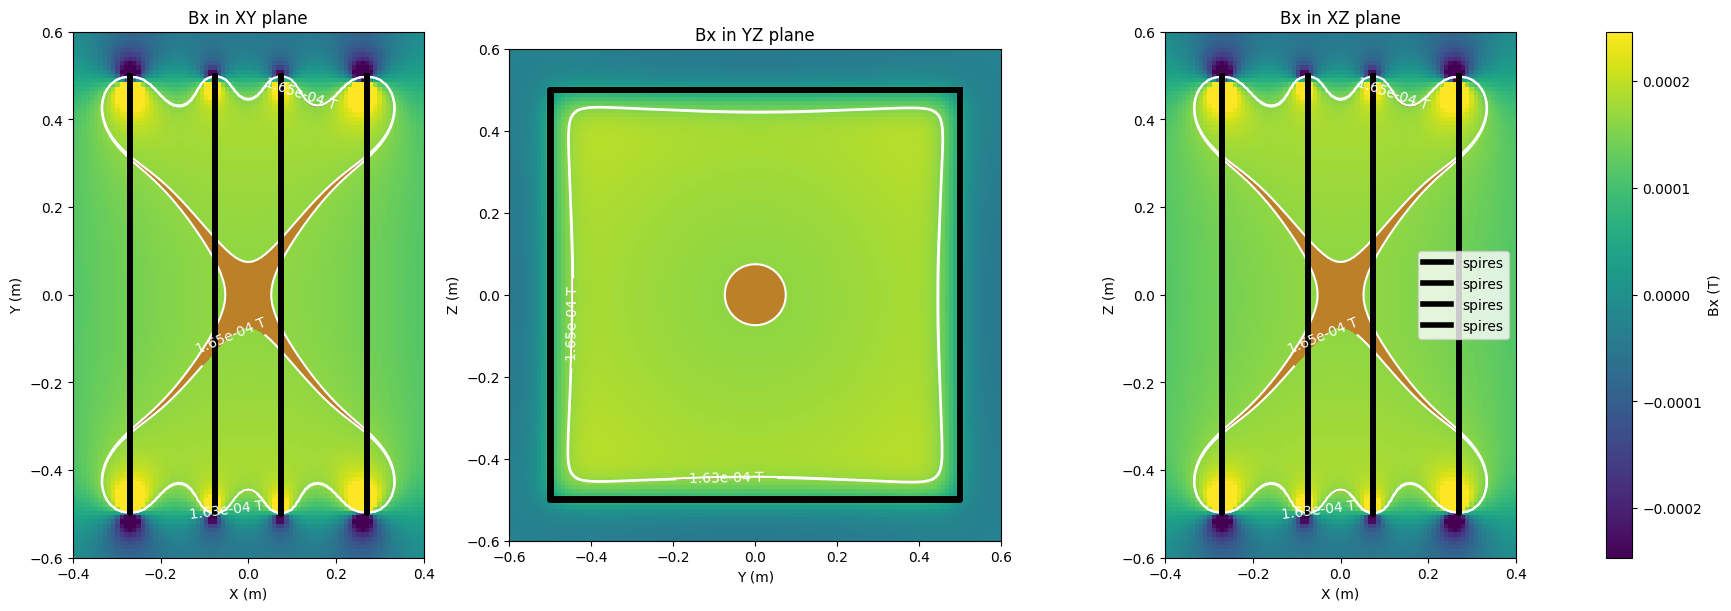

In [8]:
# Print the Bx component
hplot.plot_2d_magnetic_field(x_coil_results_s, spire_x_s, index='Bx', use_fixed_zaxis=True)

In [9]:
hplot.simple_3d_surface_plot(x_coil_results_s,spire_x_s,'Bx',True)

reference_value:  0.000164319739676
